In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__Reading the given csv files & setting attibutes__

In [391]:
company= pd.read_csv("companies.csv", encoding='unicode_escape')
company.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [392]:
#understanding countries of the companies.
company.country_code.value_counts()

USA    37601
GBR     3688
CAN     1925
IND     1596
CHN     1544
       ...  
TGO        1
KNA        1
SYC        1
PRY        1
MNE        1
Name: country_code, Length: 137, dtype: int64

In [393]:
#knowing the country which has the most companies in the given list
company.country_code.mode()[0]

'USA'

In [394]:
sns.set(style="dark")
rounds2 = pd.read_csv("rounds2.csv", encoding='unicode_escape')
mapping= pd.read_csv("mapping.csv", encoding='unicode_escape')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [395]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


**Data Cleaning** __Check Point__ 1

In [396]:
# converting the text in the colomn company_permalink & colomn permalink to lower case
rounds2["company_permalink"]=rounds2["company_permalink"].str.lower()
company["permalink"]=company["permalink"].str.lower()
rounds2.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [397]:
company.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


__Merging the 2 files to get better insight__

In [398]:
#trying to merge the 2 df's company & rounds2 to get a better insight. 
complist=pd.merge(company,rounds2, how="left", left_on="permalink", right_on="company_permalink")
complist.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [399]:
complist.shape

(114947, 16)

In [400]:
complist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114947 entries, 0 to 114946
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114947 non-null  object 
 1   name                     114946 non-null  object 
 2   homepage_url             108813 non-null  object 
 3   category_list            111538 non-null  object 
 4   status                   114947 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94426 non-null   object 
 10  company_permalink        114942 non-null  object 
 11  funding_round_permalink  114942 non-null  object 
 12  funding_round_type       114942 non-null  object 
 13  funding_round_code       31139 non-null   object 
 14  fund

***Cleaning of the data***

In [280]:
complist.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3409
status                         0
country_code                8676
state_code                 10944
region                     10165
city                       10162
founded_at                 20521
company_permalink              5
funding_round_permalink        5
funding_round_type             5
funding_round_code         83808
funded_at                      5
raised_amount_usd          19989
dtype: int64

In [281]:
#### trying to find out the percentage of missing values
round(100*(complist.isnull().sum()/len(complist.index)), 4)
### since few of the columns have less than 10 missing values hence going for 4 decimal values

permalink                   0.0000
name                        0.0009
homepage_url                5.3364
category_list               2.9657
status                      0.0000
country_code                7.5478
state_code                  9.5209
region                      8.8432
city                        8.8406
founded_at                 17.8526
company_permalink           0.0043
funding_round_permalink     0.0043
funding_round_type          0.0043
funding_round_code         72.9101
funded_at                   0.0043
raised_amount_usd          17.3898
dtype: float64

__*Except for permalink & status others have missing values*__

#Since the columns'Home URL' & 'Funding_round_code' & 'Founded' & 'Funding round type' won't help much in analysis of the investment I'm trying to remove.


In [282]:
complist.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [283]:
complist=complist[~complist['raised_amount_usd'].isnull()]

In [284]:
complist.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0


In [285]:
complist.shape

(94958, 16)

In [287]:
complist=complist[~complist['category_list'].isnull()]
complist.shape

(93914, 16)

In [290]:
complist.head()
complist=complist[~complist['country_code'].isnull()]
complist.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0


In [291]:
complist['funding_round_permalink'].value_counts().mode()[0]

#filling the missing values of the colomns using the most occured variable
complist['funding_round_permalink'].value_counts().mode()[0]
complist['funding_round_permalink']=complist['funding_round_permalink'].fillna(complist['funding_round_permalink'].value_counts().mode()[0])


In [294]:
complist.funding_round_permalink.isnull().sum()

0

In [295]:
complist.shape

(88529, 16)

In [296]:
complist=complist[~complist['name'].isnull()]

In [298]:
complist.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0


In [420]:
complist.state_code.value_counts()[0]
complist['state_code']=complist['state_code'].fillna(complist.state_code.value_counts()[0])

In [301]:
complist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88528 entries, 0 to 114945
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88528 non-null  object 
 1   name                     88528 non-null  object 
 2   homepage_url             85277 non-null  object 
 3   category_list            88528 non-null  object 
 4   status                   88528 non-null  object 
 5   country_code             88528 non-null  object 
 6   state_code               88528 non-null  object 
 7   region                   87344 non-null  object 
 8   city                     87347 non-null  object 
 9   founded_at               75159 non-null  object 
 10  company_permalink        88528 non-null  object 
 11  funding_round_permalink  88528 non-null  object 
 12  funding_round_type       88528 non-null  object 
 13  funding_round_code       26776 non-null  object 
 14  funded_at            

In [302]:
round(100*(complist.isnull().sum()/len(complist.index)), 4)

permalink                   0.0000
name                        0.0000
homepage_url                3.6723
category_list               0.0000
status                      0.0000
country_code                0.0000
state_code                  0.0000
region                      1.3374
city                        1.3340
founded_at                 15.1014
company_permalink           0.0000
funding_round_permalink     0.0000
funding_round_type          0.0000
funding_round_code         69.7542
funded_at                   0.0000
raised_amount_usd           0.0000
dtype: float64

In [417]:

complist=complist[~complist['region'].isnull()]
complist=complist[~complist['city'].isnull()]
complist['homepage_url']=complist[~complist['homepage_url'].isnull()]

In [418]:
complist.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,/organization/-fame,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,/organization/-qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,/organization/-qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,/organization/0-6-com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,/organization/004-technologies,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN


In [421]:
complist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100322 entries, 0 to 114945
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                100322 non-null  object 
 1   name                     100321 non-null  object 
 2   homepage_url             100322 non-null  object 
 3   category_list            98937 non-null   object 
 4   status                   100322 non-null  object 
 5   country_code             100322 non-null  object 
 6   state_code               100322 non-null  object 
 7   region                   100322 non-null  object 
 8   city                     100322 non-null  object 
 9   founded_at               85439 non-null   object 
 10  company_permalink        100322 non-null  object 
 11  funding_round_permalink  100322 non-null  object 
 12  funding_round_type       100322 non-null  object 
 13  funding_round_code       28234 non-null   object 
 14  fund

In [330]:
round(100*(complist.isnull().sum()/len(complist.index)), 4)

permalink                  0.0000
name                       0.0000
homepage_url               3.6534
category_list              0.0000
status                     0.0000
country_code               0.0000
state_code                 0.0000
region                     0.0000
city                       0.0000
company_permalink          0.0000
funding_round_permalink    0.0000
funding_round_type         0.0000
funded_at                  0.0000
raised_amount_usd          0.0000
dtype: float64

In [331]:
complist.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,/organization/-fame,Media,operating,IND,16,Mumbai,Mumbai,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,/organization/-qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,/organization/0-6-com,Curated Web,operating,CHN,22,Beijing,Beijing,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,/organization/01games-technology,Games,operating,HKG,22776,Hong Kong,Hong Kong,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,/organization/0ndine-biomedical-inc,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [415]:
complist=complist[~complist['homepage_url'].isnull()]

In [416]:
complist.head()
complist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108813 entries, 0 to 114946
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                108813 non-null  object 
 1   name                     108812 non-null  object 
 2   homepage_url             108813 non-null  object 
 3   category_list            106375 non-null  object 
 4   status                   108813 non-null  object 
 5   country_code             101719 non-null  object 
 6   state_code               99560 non-null   object 
 7   region                   100322 non-null  object 
 8   city                     100325 non-null  object 
 9   founded_at               90994 non-null   object 
 10  company_permalink        108810 non-null  object 
 11  funding_round_permalink  108810 non-null  object 
 12  funding_round_type       108810 non-null  object 
 13  funding_round_code       29849 non-null   object 
 14  fund

In [404]:
round(100*(complist.isnull().sum()/len(complist.index)), 4)

permalink                   0.0000
name                        0.0009
homepage_url                5.3364
category_list               2.9657
status                      0.0000
country_code                7.5478
state_code                  9.5209
region                      8.8432
city                        8.8406
founded_at                 17.8526
company_permalink           0.0043
funding_round_permalink     0.0043
funding_round_type          0.0043
funding_round_code         72.9101
funded_at                   0.0043
raised_amount_usd          17.3898
dtype: float64

In [422]:
complist.drop('funding_round_permalink', axis=1)
complist.drop('funding_round_code', axis=1)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,/organization/-fame,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,/organization/-qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,/organization/-qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,/organization/0-6-com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,/organization/004-technologies,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114940,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,/organization/zzzzapp-com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,01-11-2011,7000.0
114941,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,/organization/zzzzapp-com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,33149.0
114942,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,/organization/zzzzapp-com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,41313.0
114943,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,/organization/zzzzapp-com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,32842.0


In [429]:
complist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100322 entries, 0 to 114945
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                100322 non-null  object 
 1   name                     100321 non-null  object 
 2   homepage_url             100322 non-null  object 
 3   category_list            98937 non-null   object 
 4   status                   100322 non-null  object 
 5   country_code             100322 non-null  object 
 6   state_code               100322 non-null  object 
 7   region                   100322 non-null  object 
 8   city                     100322 non-null  object 
 9   founded_at               85439 non-null   object 
 10  company_permalink        100322 non-null  object 
 11  funding_round_permalink  100322 non-null  object 
 12  funding_round_type       100322 non-null  object 
 13  funded_at                100322 non-null  object 
 14  rais

In [432]:
complist=complist[~complist['category_list'].isnull()]
complist=complist[~complist['name'].isnull()]
complist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98936 entries, 0 to 114945
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                98936 non-null  object 
 1   name                     98936 non-null  object 
 2   homepage_url             98936 non-null  object 
 3   category_list            98936 non-null  object 
 4   status                   98936 non-null  object 
 5   country_code             98936 non-null  object 
 6   state_code               98936 non-null  object 
 7   region                   98936 non-null  object 
 8   city                     98936 non-null  object 
 9   founded_at               84656 non-null  object 
 10  company_permalink        98936 non-null  object 
 11  funding_round_permalink  98936 non-null  object 
 12  funding_round_type       98936 non-null  object 
 13  funded_at                98936 non-null  object 
 14  raised_amount_usd    

In [436]:
complist.drop('founded_at', axis=1)
complist.drop('homepage_url', axis=1)
complist=complist[~complist['raised_amount_usd'].isnull()]
complist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84153 entries, 0 to 114945
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                84153 non-null  object 
 1   name                     84153 non-null  object 
 2   homepage_url             84153 non-null  object 
 3   category_list            84153 non-null  object 
 4   status                   84153 non-null  object 
 5   country_code             84153 non-null  object 
 6   state_code               84153 non-null  object 
 7   region                   84153 non-null  object 
 8   city                     84153 non-null  object 
 9   founded_at               72340 non-null  object 
 10  company_permalink        84153 non-null  object 
 11  funding_round_permalink  84153 non-null  object 
 12  funding_round_type       84153 non-null  object 
 13  funded_at                84153 non-null  object 
 14  raised_amount_usd    

__Funding Type Analysis__ **Check Point** 2

In [437]:
# learning to understand the investment types that are very ideal and are most invested by other investers
complist.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [490]:
complist.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    7.120722e+07
venture           1.171120e+07
angel             9.703867e+05
seed              7.479241e+05
Name: raised_amount_usd, dtype: float64

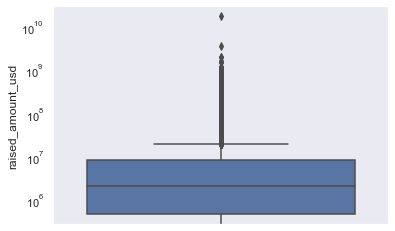

In [492]:
#visualising the distribution of data for 'raised_amount_usd' column
sns.boxplot(y=complist['raised_amount_usd'])
plt.yscale('log')
plt.show()

**There are  14 investment types that are most used by other investers**

In [438]:
#comparing the investments done in venture, seed, angel, private equity 
complist=complist[complist['funding_round_type'].isin(['venture','seed','private_equity','angel'])]
complist_4=complist.groupby('funding_round_type')

In [439]:
#finding out the mean of these four specified ventures to fnd the ideal one.
complist_4['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    7.120722e+07
venture           1.171120e+07
angel             9.703867e+05
seed              7.479241e+05
Name: raised_amount_usd, dtype: float64

>Since private_equity is much higher than the given criteria, venture is the ideal investment that other companies make

##### Country Analysis ####

In [444]:
## After finding out venture as an ideal invest we're going to work with it only hence narrowing the filter

venturety= complist[complist['funding_round_type']=='venture']
venturety.shape

(45160, 15)

In [453]:
venture_countries=venturety.groupby('country_code')
venture_countries['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

country_code
USA    3.978218e+11
CHN    3.562355e+10
GBR    1.863205e+10
IND    1.383492e+10
CAN    8.895475e+09
FRA    6.666626e+09
ISR    6.367861e+09
DEU    6.088517e+09
JPN    3.011058e+09
SWE    2.962099e+09
Name: raised_amount_usd, dtype: float64

In [469]:
first_ten = venturety[venturety['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN', 'SWE'])]

In [475]:
first_ten.shape

(41953, 16)

In [477]:
first_ten=first_ten[~first_ten.category_list.isnull()]

In [478]:
first_ten['primary_sector'] = first_ten['category_list'].astype(str).apply(lambda x: x.split('|')[0])

In [479]:
first_ten.shape

(41953, 16)

In [480]:
first_ten.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,/organization/-fame,/organization/-fame,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame
4,/organization/0-6-com,0-6.com,/organization/0-6-com,/organization/0-6-com,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,/organization/0ndine-biomedical-inc,/organization/0ndine-biomedical-inc,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc
10,/organization/0xdata,H2O.ai,/organization/0xdata,/organization/0xdata,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata
11,/organization/0xdata,H2O.ai,/organization/0xdata,/organization/0xdata,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata


In [482]:
first_ten.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
114920,/organization/zyomyx-inc,ZYOMYX,/organization/zyomyx-inc,/organization/zyomyx-inc,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc
114921,/organization/zyomyx-inc,ZYOMYX,/organization/zyomyx-inc,/organization/zyomyx-inc,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc
114932,/organization/zyrra,Zyrra,/organization/zyrra,/organization/zyrra,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra
114934,/organization/zystor,Zystor,/organization/zystor,/organization/zystor,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/organization/zystor
114939,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,/organization/zznode-science-and-technology-co...,/organization/zznode-science-and-technology-co...,operating,CHN,22,Beijing,Beijing,NaN,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,01-04-2012,1587301.0,/organization/zznode-science-and-technology-co...


***Sector Analysis***

In [484]:
####calling the mapping file which we initally read
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [488]:
mapping=mapping[~mapping.category_list.isnull()]
mapping.shape

(687, 10)

In [493]:
##creating a custom fucntion to correct the category list

def correctMapping0(category):
##Many places in the category_class column the 'na' is misprinded as '0'
    if '0' in category:
        if category.startswith("0"):    
            return category[:category.find('0')]+'Na'+category[category.find('0')+1:]
        elif category.endswith("0"):  
            return category
        else:
            return category[:category.find('0')]+'na'+category[category.find('0')+1:]
    else:
        return category

In [505]:
mapping['category_list']=list(map(correctMapping0,mapping['category_list']))

In [506]:
m=pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])
m=m[m.value==1]
m=m.drop('value',axis=1)
m.shape

(687, 2)

In [504]:
first_ten=pd.merge(first_ten,m,how="left",left_on="primary_sector",right_on="category_list")
first_ten= first_ten.drop('category_list_y',axis=1)
first_ten.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,main_sector_x,category_list_x,main_sector_y,main_sector_x,category_list_x,main_sector_y,main_sector_x,category_list_x,main_sector_y,main_sector
0,/organization/-fame,#fame,/organization/-fame,/organization/-fame,operating,IND,16,Mumbai,Mumbai,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/organization/0-6-com,0-6.com,/organization/0-6-com,/organization/0-6-com,operating,CHN,22,Beijing,Beijing,01-01-2007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,/organization/0ndine-biomedical-inc,/organization/0ndine-biomedical-inc,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/organization/0xdata,H2O.ai,/organization/0xdata,/organization/0xdata,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/organization/0xdata,H2O.ai,/organization/0xdata,/organization/0xdata,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


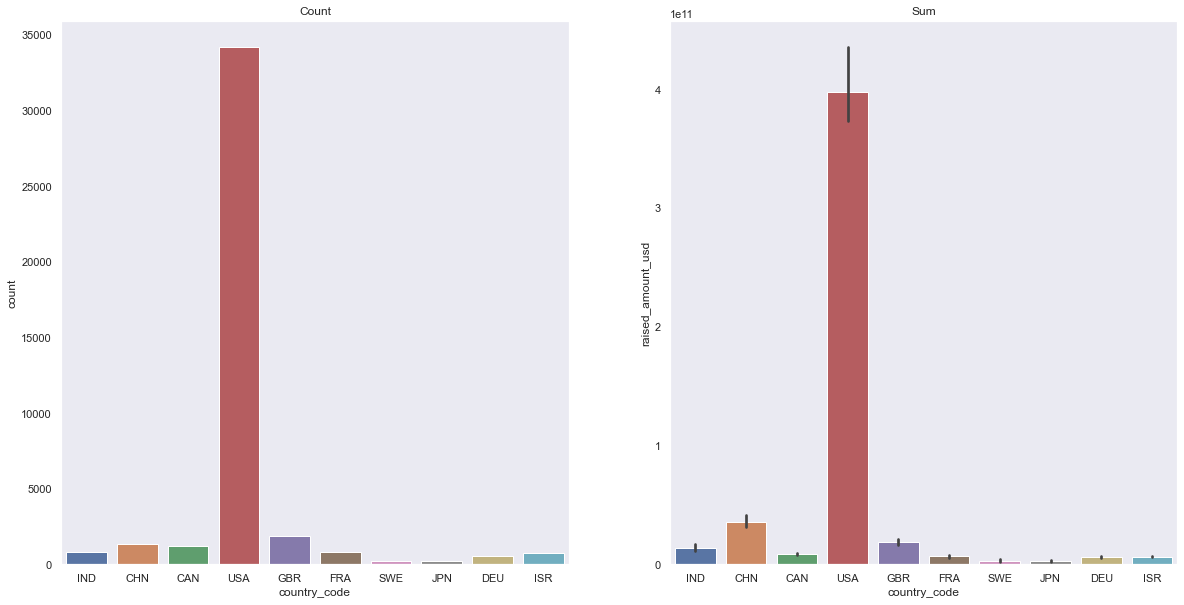

In [511]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=first_ten)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=first_ten, estimator=sum)
plt.title("Sum")
plt.show()

###The top 3 english speaking countries are GBR, IND & USA

In [514]:
first_3_english= first_ten[first_ten['country_code'].isin(['USA', 'GBR', 'IND'])]
first_3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA    3.978218e+11
GBR    1.863205e+10
IND    1.383492e+10
Name: raised_amount_usd, dtype: float64

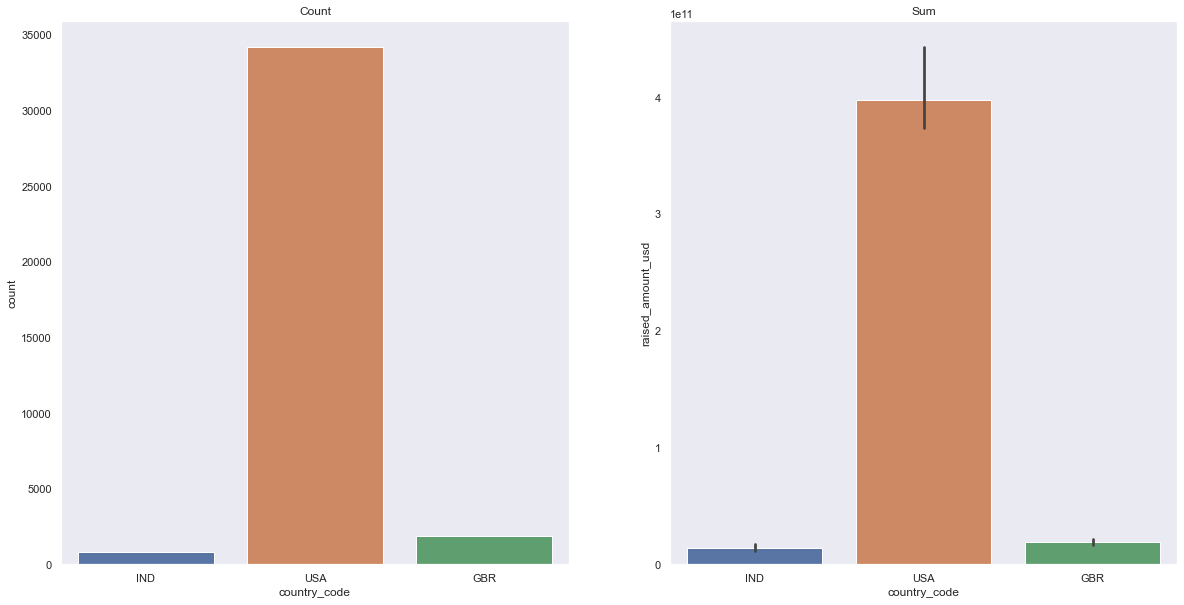

In [515]:
# Plotting sum across top 3 english official language country_code 
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=first_3_english)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=first_3_english, estimator=sum)
plt.title("Sum")
plt.show()